In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162998 sha256=0574eb73cdac9731099f80bcf9d71a2776261850e5c74bfd5a0929bef9e3d246
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
header = ['Exercise', 'Weight90', 'Weight108', 'Weight126', 'Type']
df = pd.read_csv('calorie.csv', header=None, names=header)

In [4]:
df

,Exercise,Weight90,Weight108,Weight126,Type
0,Weights,90,108,126,0.0
1,Water Aerobics,120,144,168,1.0
2,Hatha Yoga,120,144,168,NaN
3,Calisthenics,135,162,189,NaN
4,Aerobics,165,198,231,1.0
5,Stair Step Machine,180,216,252,1.0
6,Step Aerobics,210,252,294,1.0
7,Bicycling,210,252,294,1.0
8,Rowing,210,252,294,1.0
9,Circuit Training,240,240,240,1.0


# **1. FINDING MISSING VALUES**

In [5]:
df.isnull().sum()

Exercise     0
Weight90     0
Weight108    0
Weight126    0
Type         3
dtype: int64

In [6]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        print("{} has: {:,} ({:.2%}) missing values.".format(column, df[column].isna().sum(), df[column].isna().sum() / len(df)))


Type has: 3 (5.17%) missing values.


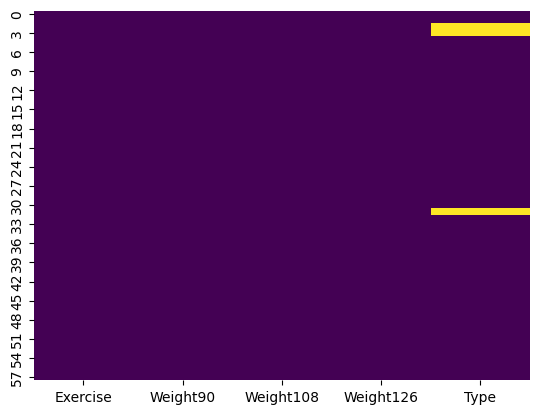

In [7]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

- **REPLACING MISSING VALUES**

In [8]:
avg_col_5 = df['Type'].astype('float').median(axis=0)
print("Average Value:",avg_col_5)

Average Value: 1.0


In [9]:
df['Type'].replace(np.nan,avg_col_5,inplace=True)

# **2. CHECKING DUPLICATION**


In [10]:
df.duplicated().sum()

0

# **3. RECOMMENDATION SYSTEM**

In [11]:
df.head(5)

,Exercise,Weight90,Weight108,Weight126,Type
0,Weights,90,108,126,0.0
1,Water Aerobics,120,144,168,1.0
2,Hatha Yoga,120,144,168,1.0
3,Calisthenics,135,162,189,1.0
4,Aerobics,165,198,231,1.0


In [12]:
df = pd.melt(df, id_vars=['Exercise', 'Type'], value_vars=['Weight90', 'Weight108', 'Weight126'],
             var_name='Weight', value_name='Calories')

In [13]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate


In [14]:
reader = Reader(rating_scale=(0, 500))

# Load data into Surprise dataset
dataset = Dataset.load_from_df(df[['Exercise', 'Weight', 'Calories']], reader)

# Define the SVD algorithm
algo = SVD()

# Perform cross-validation
cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the algorithm on the whole dataset
trainset = dataset.build_full_trainset()
algo.fit(trainset)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    23.6713 18.7855 40.0363 19.2257 28.5404 26.0518 7.8335  
MAE (testset)     17.4329 13.4397 22.9035 12.7495 17.3340 16.7719 3.6231  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


In [15]:
# Now, let's say you want recommendations for a specific user
user_id = '101'

# Get a list of all possible exercises
all_exercises = df['Exercise'].unique()


In [16]:
print("Available exercises:")
print(df['Exercise'].unique())


Available exercises:
['Weights' 'Water Aerobics' 'Hatha Yoga' 'Calisthenics' 'Aerobics'
 'Stair Step Machine' 'Step Aerobics' 'Bicycling' 'Rowing'
 'Circuit Training' 'Elliptical Trainer' 'Ski Machine' 'Bowling'
 'Slow dancing' 'Frisbee' 'Volleyball' 'Golf (w/cart)' 'Golf (w/clubs)'
 'Gymnastics' 'Horseback Riding' 'Tai Chi' 'Walking' 'Badminton'
 'Kayaking' 'Skateboarding' 'Softball' 'Whitewater' 'Fast dancing'
 'Hiking' 'Skiing' 'Swimming' 'Jog' 'Wrestling' 'Basketball'
 'Basketball (w/wheelchair)' 'Ice Skating' 'Racquetball' 'Rollerblading'
 'Scuba diving' 'Sledding' 'Soccer' 'Tennis' 'Football' 'Hockey'
 'Rock Climbing' 'Snow shoeing' 'Boxing' 'Martial arts'
 'Cross-country running' 'Rope jumping' 'Water polo' 'Lawn raking'
 'Gardening' 'Lawn mowing' 'Snow blower' 'Wood stacking' 'Wood splitting'
 'Snow shoveling']


In [17]:
# Filter out exercises that the user has already rated
already_rated = df[df['Weight'] == 90]['Exercise'].unique()  # Assuming all users have the same exercise history
exercises_to_predict = [exercise for exercise in all_exercises if exercise not in already_rated]

# Predict ratings for exercises the user hasn't rated yet
predictions = [algo.predict(user_id, exercise) for exercise in exercises_to_predict]

# Sort the predictions by estimated rating
predictions.sort(key=lambda x: x.est, reverse=True)

In [18]:
# Print the top recommended exercises
print("Top recommended exercises for {}: ".format(user_id))
for pred in predictions[:10]:  # Print top 10 recommendations
    print("Exercise:", pred.iid, " Estimated Calories Burned:", pred.est)

Top recommended exercises for 101: 
Exercise: Weights  Estimated Calories Burned: 214.54022988505747
Exercise: Water Aerobics  Estimated Calories Burned: 214.54022988505747
Exercise: Hatha Yoga  Estimated Calories Burned: 214.54022988505747
Exercise: Calisthenics  Estimated Calories Burned: 214.54022988505747
Exercise: Aerobics  Estimated Calories Burned: 214.54022988505747
Exercise: Stair Step Machine  Estimated Calories Burned: 214.54022988505747
Exercise: Step Aerobics  Estimated Calories Burned: 214.54022988505747
Exercise: Bicycling  Estimated Calories Burned: 214.54022988505747
Exercise: Rowing  Estimated Calories Burned: 214.54022988505747
Exercise: Circuit Training  Estimated Calories Burned: 214.54022988505747
